In [65]:
# Import dependencies
import pandas as pd
import random as random
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats
from scipy.stats import linregress
from scipy.stats import f_oneway
import requests
import json


import warnings
warnings.filterwarnings('ignore')
warnings.simplefilter('ignore')

In [2]:
#Jeff Code

#Functions to be used for code

#Function #1
#plotting routine with regression (setting up as a function)
#below function takes 2 sets of x and y data and generates a scatter plot for each.  Then performs a linear regression 
#and returns a dataframe with the regression results
#x and y are number pairs
#data is the name of what is being plotted (like temperature).  used as Y axis label and as part of title
#prints results of regression below graphs

def plotter(x1,y1,Data1,x2,y2,Data2):
   
   #plotting data set x1 and y1

    (slope_N, intercept_N, rvalue_N, pvalue_N, stderr_N) = linregress(x1,y1)
    regress_values_N = x1 * slope_N + intercept_N
    line_eq = "y = " + str(round(slope_N,3)) + "x + " + str(round(intercept_N,3))+", r = " +str(round(rvalue_N,3))\
                        + " p = "+str(round(pvalue_N,3))
    max_y = y1.max()
    min_x = x1.min()
    fig = plt.figure(figsize = (15,4))
    ax1 = fig.add_subplot(121)
    ax1.scatter(x1, y1, s=5)
    plt.plot(x1,regress_values_N,"r-")
    plt.annotate(line_eq,(min_x+1,max_y-1),fontsize=11,color="red") #writes to coordinates on graph
    plt.xlabel("Year")
    plt.ylabel(f"{Data1} ")
    plt.title(f"{Data1} vs Year")

  #plotting data set x2 and y2
    (slope_S, intercept_S, rvalue_S, pvalue_S, stderr_S) = linregress(x2,y2)
    regress_values_S = x2 * slope_S + intercept_S
    line_eq = "y = " + str(round(slope_S,3)) + "x + " + str(round(intercept_S,3))+", r = " +str(round(rvalue_S,3))\
                        + " p = "+str(round(pvalue_S,3))
    max_y = y2.max()
    min_x = x2.min()
    #plotting second data set
    ax2 = fig.add_subplot(122)
    ax2.scatter(x2, y2, s=5)
    plt.plot(x2,regress_values_S,"r-")
    plt.annotate(line_eq,(min_x+1,max_y-1),fontsize=11,color="red") #writes to coordinates on graph
    plt.xlabel("Year")
    plt.ylabel(f"{Data2}")
    plt.title(f"{Data2} vs Year")
    
    plt.show()


    Result_Temp_df = pd.DataFrame({"Slope":[slope_N, slope_S], "Intercept":[intercept_N, intercept_S], 
                                                         "r-value":[rvalue_N, rvalue_S], "p-value":[pvalue_N, pvalue_S]})

    Result_Temp_df["Param"] =[Data1, Data2]
    Result_Temp_df = Result_Temp_df[["Param", "Slope", "Intercept", "r-value", "p-value"]]

    print(f"Correlation Results")
    print("")

    print(Result_Temp_df)
    return Result_Temp_df;

In [3]:
# Kristina's code starts here

In [4]:
# Kristina's code ends here

In [5]:
# Jeff's code starts here

#reading in raw data
temp_data_df = pd.read_csv('Resources/clean_temp_data.csv')
temp_data_df.head(3)


,Unnamed: 0,Name,Date,Total Monthly Precipitation,Total Montly Snowfall (mm),Avg Monthly Temp,Monthly Mean Max Temp,Monthly Mean Min Temp
0,0,"ADA, MN US",1950-01,1.30,NaN,NaN,NaN,-16.4
1,1,"ADA, MN US",1950-02,0.10,1.0,7.1,19.1,-5.0
2,2,"ADA, MN US",1950-03,1.14,0.3,19.5,29.5,9.4


In [6]:
names = temp_data_df.columns
print("Before")
for i in names:
    full = temp_data_df[i].count()
    Null = temp_data_df[i].isnull().sum(axis = 0)
    print(f"for {i} column: Full {full} vs Empty or NaN {Null}")
    


Before
for Unnamed: 0 column: Full 7030 vs Empty or NaN 0
for Name column: Full 7030 vs Empty or NaN 0
for Date column: Full 7030 vs Empty or NaN 0
for Total Monthly Precipitation column: Full 6826 vs Empty or NaN 204
for Total Montly Snowfall (mm) column: Full 6020 vs Empty or NaN 1010
for Avg Monthly Temp column: Full 6458 vs Empty or NaN 572
for Monthly Mean Max Temp column: Full 6592 vs Empty or NaN 438
for Monthly Mean Min Temp column: Full 6490 vs Empty or NaN 540


In [7]:

#removing NaN
Start_Length = len(temp_data_df["Date"])
temp_data_df.dropna(inplace = True)

#temp_data_df
Finish_Length = len(temp_data_df["Date"])
print(f"Temperature and precipitation data starts with {Start_Length} records")
print(f"After removing rows with empty data fields have {Finish_Length} records")

#code below combines all locations into one average value for month and year
list = temp_data_df["Name"].unique()
temp_comb_df = temp_data_df.groupby(["Date"])["Total Monthly Precipitation", "Total Montly Snowfall (mm)",
                                             "Avg Monthly Temp", "Monthly Mean Max Temp",
                                              "Monthly Mean Min Temp"].mean().reset_index()

#Data is string Year-Month (month two digits 01-12).  This splits into two fields
temp_comb_df["Month"] = temp_comb_df["Date"].str.split("-").str[1].astype(int)
temp_comb_df["Year"] = temp_comb_df["Date"].str.split("-").str[0].astype(int)

col_list = temp_comb_df.columns.tolist()
Season_data_df = pd.DataFrame(columns = col_list)

#combining months to form seasons: Winter (Dec-Feb), Fall(Mar-May), Summer(June-Aug), Fall(Sept-Nov)
for i in temp_comb_df["Year"].unique():
    if i!= 1950 and i!= 2020: #ignore 1950 because don't have dec 1949 and don't have all 2020
        
        #in dataframe the "month" represents the season: 2=winter, 4 = spring, 7 = summer, 10=fall
        winter_data = temp_comb_df.loc[((temp_comb_df["Year"]==i) & (temp_comb_df["Month"].between(1,2)))|\
                                         ((temp_comb_df["Year"]==(i-1)) & (temp_comb_df["Month"]==12))].mean()
        winter_data["Year"]=winter_data["Year"].astype(int)+1 # extra 1 because rounds down to year previous
        winter_data["Month"] = 1 #would be 5 otherwise (mean(12,1,2))
        spring_data = temp_comb_df.loc[((temp_comb_df["Year"]==i) & (temp_comb_df["Month"].between(3,5)))].mean()
        spring_data["Year"]=spring_data["Year"].astype(int)
        summer_data = temp_comb_df.loc[((temp_comb_df["Year"]==i) & (temp_comb_df["Month"].between(6,8)))].mean()
        summer_data["Year"]=summer_data["Year"].astype(int)
        fall_data = temp_comb_df.loc[((temp_comb_df["Year"]==i) & (temp_comb_df["Month"].between(9,11)))].mean() 
        fall_data["Year"]=fall_data["Year"].astype(int)
        
        frames = [winter_data, spring_data, summer_data, fall_data]
        Season_data_df = Season_data_df.append(frames, ignore_index = True)
        
winter = 1
sprint = 4
summer = 7
fall = 10
Season_data_df["Temp Swing"] = Season_data_df["Monthly Mean Max Temp"]-Season_data_df["Monthly Mean Min Temp"]
Season_data_df.drop(columns=["Date"], inplace = True)


Temperature and precipitation data starts with 7030 records
After removing rows with empty data fields have 5560 records


In [8]:
Season_data_df

,Total Monthly Precipitation,Total Montly Snowfall (mm),Avg Monthly Temp,Monthly Mean Max Temp,Monthly Mean Min Temp,Month,Year,Temp Swing
0,0.710476,8.096296,7.851323,17.735979,-2.006878,1.0,1951.0,19.742857
1,1.875463,9.306944,37.860185,48.611574,27.108333,4.0,1951.0,21.503241
2,3.767778,0.000000,63.918519,75.203704,52.640741,7.0,1951.0,22.562963
3,1.770509,3.470833,39.780093,49.213426,30.370833,10.0,1951.0,18.842593
4,0.979722,10.074537,11.093519,20.641204,1.537963,1.0,1952.0,19.103241
...,...,...,...,...,...,...,...,...
271,3.013333,1.933333,42.022222,50.200000,33.866667,10.0,2018.0,16.333333
272,1.357778,16.577778,12.000000,20.688889,3.344444,1.0,2019.0,17.344444
273,3.455556,8.244444,38.588889,48.933333,28.222222,4.0,2019.0,20.711111
274,3.862222,0.000000,67.608333,78.461111,56.766667,7.0,2019.0,21.694444



Minimum and Maximum Avg Temperatures for Winter Months



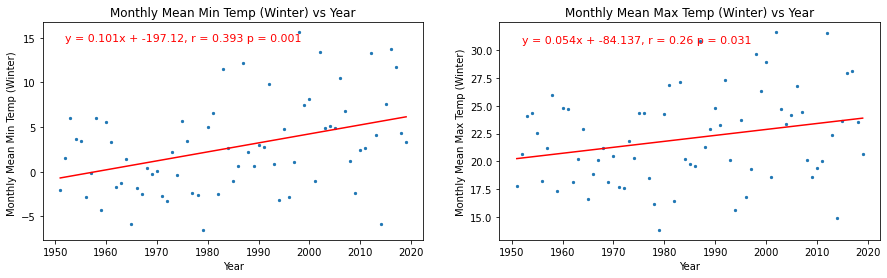

Correlation Results

                            Param     Slope   Intercept   r-value   p-value
0  Monthly Mean Min Temp (Winter)  0.100675 -197.120311  0.393008  0.000836
1  Monthly Mean Max Temp (Winter)  0.053501  -84.136979  0.260102  0.030897


In [9]:
Data1 = "Monthly Mean Min Temp"
x1 =  Season_data_df[Season_data_df["Month"]==winter]["Year"]
y1 =  Season_data_df[Season_data_df["Month"]==winter][Data1]
Data2 = "Monthly Mean Max Temp"
x2 =  Season_data_df[Season_data_df["Month"]==winter]["Year"]
y2 =  Season_data_df[Season_data_df["Month"]==winter][Data2]
print("")
print(f"Minimum and Maximum Avg Temperatures for Winter Months")
print("")
Data1 = Data1 + " (Winter)"
Data2= Data2 + " (Winter)"
Correlation_df = plotter(x1,y1,Data1,x2,y2,Data2)


Avg Temperature Swings for Winter and Summer (Seasonal max - seasonal min)



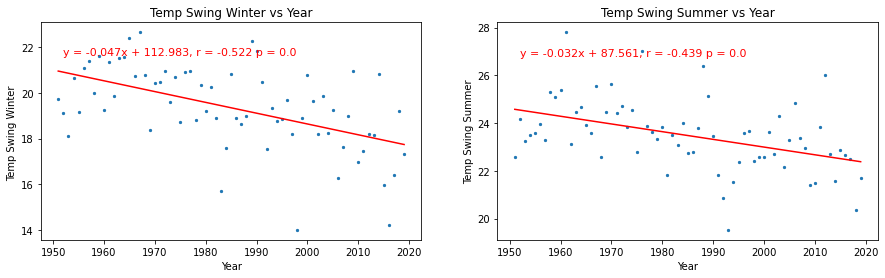

Correlation Results

               Param     Slope   Intercept   r-value   p-value
0  Temp Swing Winter -0.047175  112.983332 -0.522064  0.000004
1  Temp Swing Summer -0.032283   87.561355 -0.439178  0.000160


In [10]:
Data1 = "Temp Swing"
x1 =  Season_data_df[Season_data_df["Month"]==winter]["Year"]
y1 =  Season_data_df[Season_data_df["Month"]==winter][Data1]
Data2 = "Temp Swing"
x2 =  Season_data_df[Season_data_df["Month"]==summer]["Year"]
y2 =  Season_data_df[Season_data_df["Month"]==summer][Data2]
print("")
print(f"Avg Temperature Swings for Winter and Summer (Seasonal max - seasonal min)")
print("")
Data1 = Data1 +" Winter"
Data2 = Data2 +" Summer"
Correlation_df = plotter(x1,y1,Data1,x2,y2,Data2)

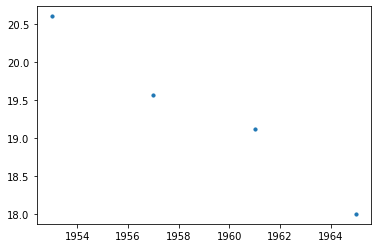

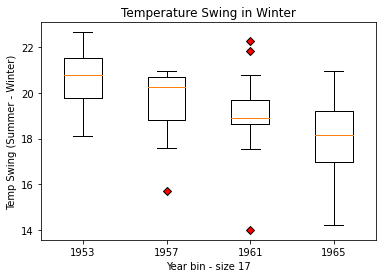

F_onewayResult(statistic=0.0, pvalue=1.0)

In [75]:
#Analysis for Winter
#ANOVA
#binning data for analysis
year_min = Season_data_df["Year"].min()
year_max = Season_data_df["Year"].max()
delta_year = year_max-year_min
delta_year
bin_size = 17 #number of years

bins = [(year_min+i*bin_size) for i in range(0,int(delta_year/bin_size)+1)]
groups = [((i-1)*4+1953) for i in range(1,int(delta_year/bin_size)+1)]
Season_data_df["Bin"]=pd.cut(Season_data_df["Year"],bins, labels = groups, include_lowest = True)

#plotting average for bins
x_label = groups
y_label = [Season_data_df[(Season_data_df["Bin"]==i)&(Season_data_df["Month"]==winter)]["Temp Swing"].mean() for i in groups]
plt.scatter(x_label,y_label,s = 20)
plt.xlabel(f"Year bin - size {bin_size}")
plt.ylabel('Temp Swing (Max-Min)')
plt.show()


#box plot of full data in bins
red_diamond = dict(markerfacecolor='r', marker='D')
fig1, ax1 = plt.subplots()
ax1.set_title('Temperature Swing in Winter')
ax1.set_ylabel('Temp Swing (Ma)')
ax1.set_xlabel(f"Year bin - size {bin_size}")

ax1.boxplot([Season_data_df[(Season_data_df["Bin"]==i)&(Season_data_df["Month"]==winter)]["Temp Swing"] for i in groups], labels=groups,showfliers = True,
            flierprops = red_diamond)
plt.show()

bin_1 = Season_data_df[Season_data_df["Bin"]==groups[0]]["Temp Swing"].tolist()
bin_2 = Season_data_df[Season_data_df["Bin"]==groups[0]]["Temp Swing"].tolist()
bin_3 = Season_data_df[Season_data_df["Bin"]==groups[0]]["Temp Swing"].tolist()
bin_4 = Season_data_df[Season_data_df["Bin"]==groups[0]]["Temp Swing"].tolist()
f_oneway(bin_1, bin_2, bin_3, bin_4)

In [56]:
Season_data_df

,Total Monthly Precipitation,Total Montly Snowfall (mm),Avg Monthly Temp,Monthly Mean Max Temp,Monthly Mean Min Temp,Month,Year,Temp Swing,Bin
0,0.710476,8.096296,7.851323,17.735979,-2.006878,1.0,1951.0,19.742857,1953
1,1.875463,9.306944,37.860185,48.611574,27.108333,4.0,1951.0,21.503241,1953
2,3.767778,0.000000,63.918519,75.203704,52.640741,7.0,1951.0,22.562963,1953
3,1.770509,3.470833,39.780093,49.213426,30.370833,10.0,1951.0,18.842593,1953
4,0.979722,10.074537,11.093519,20.641204,1.537963,1.0,1952.0,19.103241,1953
...,...,...,...,...,...,...,...,...,...
271,3.013333,1.933333,42.022222,50.200000,33.866667,10.0,2018.0,16.333333,1965
272,1.357778,16.577778,12.000000,20.688889,3.344444,1.0,2019.0,17.344444,1965
273,3.455556,8.244444,38.588889,48.933333,28.222222,4.0,2019.0,20.711111,1965
274,3.862222,0.000000,67.608333,78.461111,56.766667,7.0,2019.0,21.694444,1965


In [12]:
temp_comb_df.head(14)

,Date,Total Monthly Precipitation,Total Montly Snowfall (mm),Avg Monthly Temp,Monthly Mean Max Temp,Monthly Mean Min Temp,Month,Year
0,1950-01,1.205000,14.666667,-3.933333,6.883333,-14.783333,1,1950
1,1950-02,0.222500,2.050000,8.762500,21.300000,-3.750000,2,1950
2,1950-03,1.466250,8.537500,18.575000,29.387500,7.687500,3,1950
3,1950-04,2.006667,13.516667,31.433333,39.900000,22.983333,4,1950
4,1950-05,4.131250,0.075000,50.962500,61.200000,40.712500,5,1950
5,1950-06,2.878571,0.000000,64.171429,76.557143,51.742857,6,1950
6,1950-07,3.011250,0.000000,66.537500,77.650000,55.387500,7,1950
7,1950-08,1.632222,0.000000,63.366667,75.955556,50.744444,8,1950
8,1950-09,3.293333,0.000000,59.388889,71.177778,47.622222,9,1950
9,1950-10,1.936667,0.888889,48.155556,58.411111,37.877778,10,1950


In [45]:
precip_comb_df = temp_comb_df.groupby(["Year"])["Total Monthly Precipitation","Month"].sum().reset_index()


precip_comb_df = precip_comb_df.rename(columns = {"Total Monthly Precipitation":"Total Precipitation (mm)"})


In [46]:
precip_comb_df
precip_comb_df=precip_comb_df.drop(70)
precip_comb_df

,Year,Total Precipitation (mm),Month
0,1950,23.668472,78
1,1951,24.847500,78
2,1952,19.697679,78
3,1953,28.259861,78
4,1954,22.834762,78
...,...,...,...
65,2015,30.396667,78
66,2016,31.910000,78
67,2017,31.221667,78
68,2018,28.977500,78


In [47]:
precip_comb_df["Month"].unique()

array([78])

Text(0, 0.5, 'Total Precipitation (inches)')

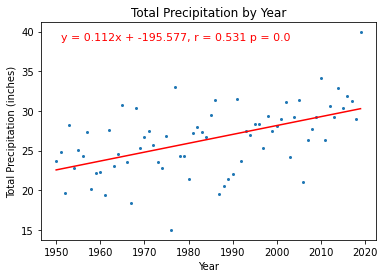

In [48]:
x_axis = precip_comb_df["Year"]
y_axis = precip_comb_df["Total Precipitation (mm)"]

max_y = y_axis.max()
min_x = x_axis.min()
plt.scatter(x_axis,y_axis, s = 4)
(slope_N, intercept_N, rvalue_N, pvalue_N, stderr_N) = linregress(x_axis,y_axis)
regress_values_N = x_axis * slope_N + intercept_N
line_eq = "y = " + str(round(slope_N,3)) + "x + " + str(round(intercept_N,3))+", r = " +str(round(rvalue_N,3))\
                        + " p = "+str(round(pvalue_N,3))
plt.plot(x_axis,regress_values_N,"r-")
plt.annotate(line_eq,(min_x+1,max_y-1),fontsize=11,color="red") #writes to coordinates on graph
plt.title("Total Precipitation by Year")
plt.xlabel("Year")
plt.ylabel("Total Precipitation (inches)")  #need to double check units - temperature is F, would precip be inches

In [ ]:
#Jeff's code ends here

In [ ]:
# Faduma's code starts here

In [ ]:
# Faduma's code ends here

In [ ]:
# Emily's code starts here

In [ ]:
storm_data = pd.read_csv('Resources/clean_storm_event_data.csv')
storm_data

In [ ]:
storm_data['Event Type'].unique()

# Counts of Tornado Eventsin Minnesota from 1950 to 2020

In [ ]:
year_list = storm_data["Year"].unique()
event_list = storm_data["Event Type"].unique()


clean_tornado_df = pd.DataFrame()
clean_tornado_df = storm_data[storm_data["Event Type"]=="Tornado"]


#clean_storm_data_mn_df
year_count_df = pd.DataFrame()
for i in year_list:
    year_count = clean_tornado_df[clean_tornado_df["Year"]==i]["Event Type"].count()
    year_count_df = year_count_df.append({"Year":i, "Count":year_count}, ignore_index=True)
year_count_df

x_data = (year_count_df["Year"].astype(int))
y_data = year_count_df["Count"].astype(float)

plt.scatter(x_data,y_data, s = 4)
plt.xlabel("Year")
plt.ylabel("Count")
plt.title("Counts of Tornado Events vs Year")

(slope_N, intercept_N, rvalue_N, pvalue_N, stderr_N) = linregress(x_data,y_data)
regress_values_N = x_data * slope_N + intercept_N
line_eq = "y = " + str(round(slope_N,2)) + "x + " + str(round(intercept_N,2))+", r = " +str(round(rvalue_N,2))+", p="+str(round(pvalue_N,2))
min_x = x_data.min()
max_y = y_data.max()
plt.plot(x_data,regress_values_N,"r-")
plt.annotate(line_eq,(min_x+1,max_y-1),fontsize=11,color="red") #writes to coordinates on graph
plt.show()

# Counts of Hail Events in Minnesota from 1950 to 2020

In [ ]:
clean_hail_df = pd.DataFrame()
clean_hail_df = storm_data[storm_data["Event Type"]=="Hail"]


#clean_storm_data_mn_df
year_count_df = pd.DataFrame()
for i in year_list:
    year_count = clean_hail_df[clean_hail_df["Year"]==i]["Event Type"].count()
    year_count_df = year_count_df.append({"Year":i, "Count":year_count}, ignore_index=True)
year_count_df

x_data = (year_count_df["Year"].astype(int))
y_data = year_count_df["Count"].astype(float)

plt.scatter(x_data,y_data, s = 4)
plt.xlabel("Year")
plt.ylabel("Count")
plt.title("Counts of Hail Events vs Year")

(slope_N, intercept_N, rvalue_N, pvalue_N, stderr_N) = linregress(x_data,y_data)
regress_values_N = x_data * slope_N + intercept_N
line_eq = "y = " + str(round(slope_N,2)) + "x + " + str(round(intercept_N,2))+", r = " +str(round(rvalue_N,2))+", p="+str(round(pvalue_N,2))
min_x = x_data.min()
max_y = y_data.max()
plt.plot(x_data,regress_values_N,"r-")
plt.annotate(line_eq,(min_x+1,max_y-1),fontsize=11,color="red") #writes to coordinates on graph
plt.show()

# Counts of Thunderstorm Wind Events in Minnesota from 1950 to 2020

In [ ]:
clean_thunderstorm_wind_df = pd.DataFrame()
clean_thunderstorm_wind_df = storm_data[storm_data["Event Type"]=="Thunderstorm Wind"]


#clean_storm_data_mn_df
year_count_df = pd.DataFrame()
for i in year_list:
    year_count = clean_thunderstorm_wind_df[clean_thunderstorm_wind_df["Year"]==i]["Event Type"].count()
    year_count_df = year_count_df.append({"Year":i, "Count":year_count}, ignore_index=True)
year_count_df

x_data = (year_count_df["Year"].astype(int))
y_data = year_count_df["Count"].astype(float)

plt.scatter(x_data,y_data, s = 4)
plt.xlabel("Year")
plt.ylabel("Count")
plt.title("Counts of Thunderstorm/Wind Events vs Year")

(slope_N, intercept_N, rvalue_N, pvalue_N, stderr_N) = linregress(x_data,y_data)
regress_values_N = x_data * slope_N + intercept_N
line_eq = "y = " + str(round(slope_N,2)) + "x + " + str(round(intercept_N,2))+", r = " +str(round(rvalue_N,2))+", p="+str(round(pvalue_N,2))
min_x = x_data.min()
max_y = y_data.max()
plt.plot(x_data,regress_values_N,"r-")
plt.annotate(line_eq,(min_x+1,max_y-1),fontsize=11,color="red") #writes to coordinates on graph
plt.show()

# Total Count of Tornado, Thunderstorm/Wind, and Hail Events in Minnesota from 1950 to 2020

In [ ]:
# Emily's code ends here